## Supervised ensemble regression

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Training KNeighborsRegressor...
best parameter:  {'n_neighbors': 30, 'weights': 'uniform', 'leaf_size': 1}
best score:  -62.1720785503




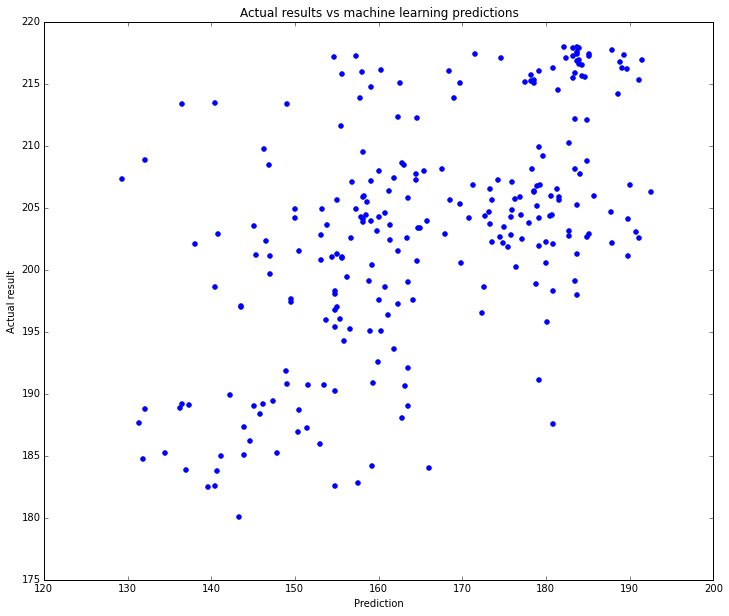

Score - variance between prediction and real-world results (n_neighbors = 25)
regr.score(X_test, y_test): -16.94
Mean squared error:  1569.04920972 



--------------------------------------
Ensemble - bagging




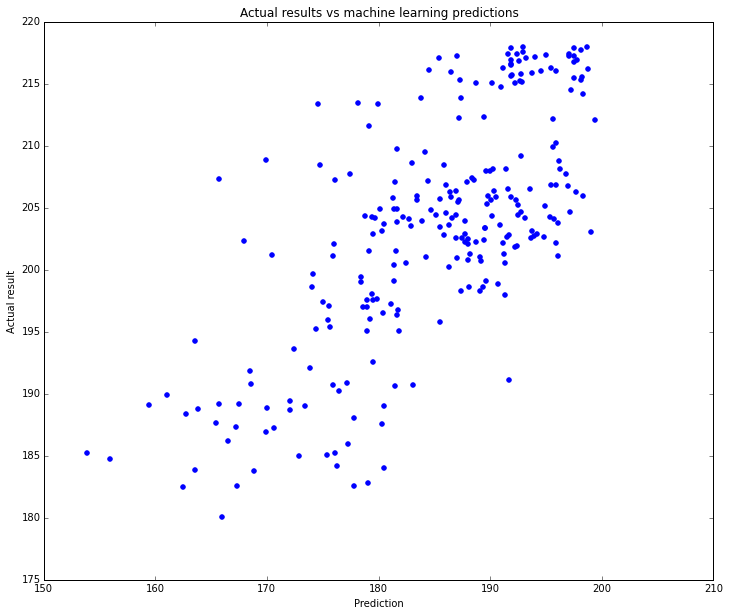

Score - variance between prediction and real-world results (n_neighbors = 25)
regr.score(X_test, y_test): -3.41
Mean squared error:  385.46984265 



In [4]:
import time
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error

# Ensemble
from sklearn.ensemble import BaggingRegressor


def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def plot_selected(df, columns, start_index, end_index):
    plot_data(df.ix[start_index:end_index,columns], title="SPY")
    
def plot_data(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
 
def train_knn(knn, X, y):
    print "Training {}...".format(knn.__class__.__name__)
    start = time.time()
    
    # parameters for gridsearchCV
    k = [1,5,10,15,20,25,30]
    leaves = [1,5,10,15,20,25,30]
    weights = ['uniform', 'distance']
    parameters = {'n_neighbors': k, 'leaf_size': leaves, 'weights': weights}
    
    # Implement GridSearchCV
    knn = GridSearchCV(knn, parameters, cv=10)
    knn.fit(X, y)
    
    print "best parameter: ", knn.best_params_
    print "best score: ", knn.best_score_
    print "\n"
    
    end = time.time()
    return knn

def show_knn_regression():
    
    df = pd.read_csv(symbol_to_path('SPY'), index_col='Date', 
                parse_dates=True, 
                usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
                na_values=['nan'])
    
    # sort data chronologically
    df = df.sort_index(ascending=True, axis=0)
    
    # add new column to view Adj Close 5 days later
    df['Adj_Close_5_Days_Later'] = df['Adj Close']
    df['Adj_Close_5_Days_Later'] = df['Adj_Close_5_Days_Later'].shift(-5)
   
    X_train = df.iloc[0:1000,:-1]
    y_train = df.iloc[0:1000, -1]
    X_test = df.iloc[1000:1253,:-1]
    y_test = df.iloc[1000:1253, -1]
    
    # Use knn regression algorithm
    knn = KNeighborsRegressor()
    train_knn(knn, X_train, y_train)
    
    # Create linear regression object
    # regr = KNeighborsRegressor()
    regr = KNeighborsRegressor(n_neighbors=25, weights='uniform', leaf_size=1)

    # Fit model to training data
    regr.fit(X_train, y_train)
    
    # Plot outputs
    plt.figure(figsize=(12,10))
    plt.title("Actual results vs machine learning predictions")
    plt.xlabel("Prediction")
    plt.ylabel("Actual result")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    
    # Explained variance score: 1 is perfect
    # Score
    print "Score - variance between prediction and real-world results (n_neighbors = 25)"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    
    # The mean square error
    print "Mean squared error: ", mean_squared_error(regr.predict(X_test), y_test), "\n"
    # print("Residual sum of squares: %.2f"
          # % np.mean((regr.predict(X_test) - y_test) ** 2))
        
        
    print "\n"
    print "--------------------------------------"
    print "Ensemble - bagging"
    print "\n"
    
    # bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
    knn_bagging = BaggingRegressor(KNeighborsRegressor(), max_samples=0.5, max_features=0.5)
    
    # Fit model to training data
    knn_bagging.fit(X_train, y_train)
    
    # Plot outputs
    plt.figure(figsize=(12,10))
    plt.title("Actual results vs machine learning predictions")
    plt.xlabel("Prediction")
    plt.ylabel("Actual result")
    plt.scatter(knn_bagging.predict(X_test), y_test, color='blue')
    plt.show()
    
    # Explained variance score: 1 is perfect
    # Score
    print "Score - variance between prediction and real-world results (n_neighbors = 25)"
    print('regr.score(X_test, y_test): %.2f' % knn_bagging.score(X_test, y_test))
    
    # The mean square error
    print "Mean squared error: ", mean_squared_error(knn_bagging.predict(X_test), y_test), "\n"
    # print("Residual sum of squares: %.2f"
          # % np.mean((regr.predict(X_test) - y_test) ** 2))
    
   
if __name__ == "__main__":
    show_knn_regression()